In [1]:
#esse código era só pra descobrir como abre a câmera no python
import cv2
webcam = cv2.VideoCapture(0)

while True:
    verificador, frame = webcam.read()
    cv2.imshow("Rosto na Webcam", frame)
    if cv2.waitKey(1) == ord('q'):
        break
webcam.release()
cv2.destroyAllWindows()



KeyboardInterrupt: 

In [3]:
#biblioteca do google uma api que encontra rostos funciona tbm

import cv2 #opencv
import mediapipe as mp

webcam = cv2.VideoCapture(0)
reconhecer_Rosto = mp.solutions.face_detection.FaceDetection()
desenho = mp.solutions.drawing_utils

while True:
    verificador, frame = webcam.read()
    if not verificador:
        break
    lista_Rosto = reconhecer_Rosto.process(frame)
    if lista_Rosto.detections:
        for rosto in lista_Rosto.detections:
            desenho.draw_detection(frame, rosto)
    cv2.imshow("Rosto na Webcam", frame)
    if cv2.waitKey(1) == ord('q'):
        break
webcam.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

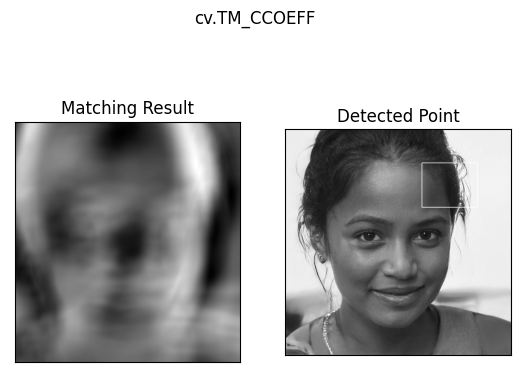

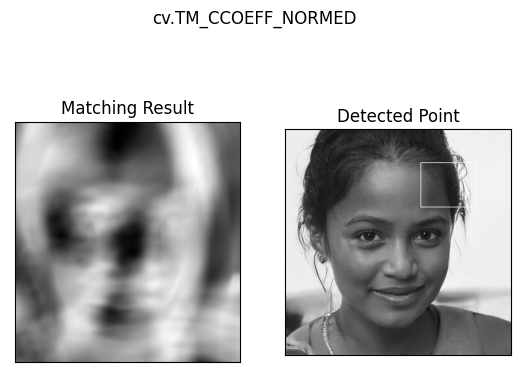

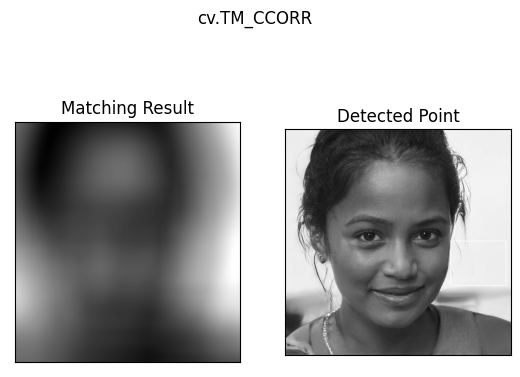

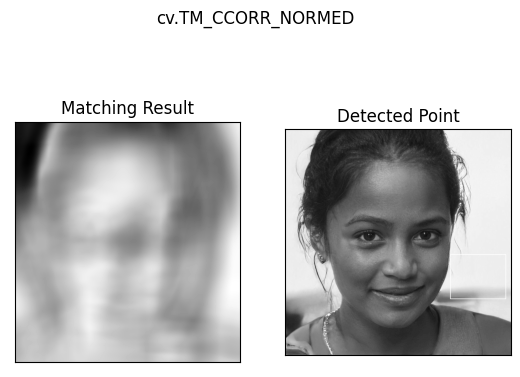

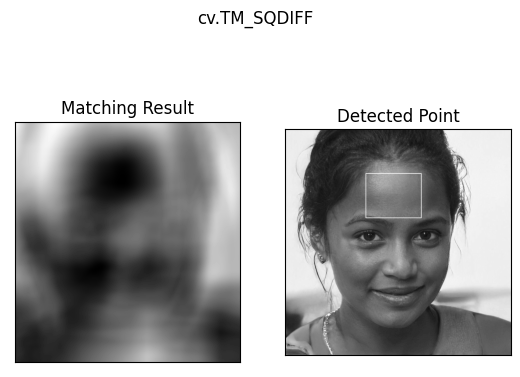

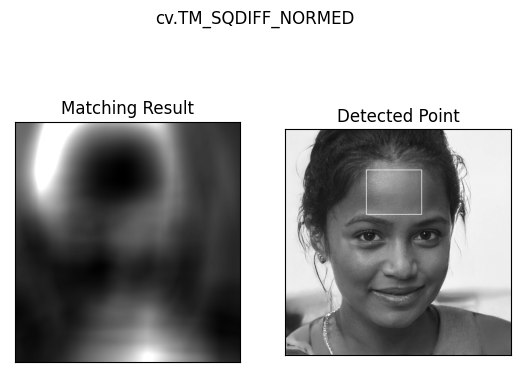

In [6]:
#Esse é o template matching porém com imagens apenas para saber como funciona, está funcionando

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('rosto4.jpeg',0)
img2 = img.copy()
template = cv.imread('template.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [4]:
#cascade tá funcionando lendo rosto e olhos

import numpy as np
import cv2

cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

while True:
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 5)
        roi_gray = gray[y:y+w, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 5)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [1]:
#template matching, não funcionando apenas um teste
import cv2
from matplotlib import pyplot as plt
import numpy as np

cap = cv2.VideoCapture(0) #Webcam Capture
#template matching
while True:
	ret, frame = cap.read()
	img_rgb = frame
	imageGray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
	
	template = cv2.imread('template.jpg', 0)
	# templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
	w, h = template.shape[::]

	res = cv2.matchTemplate(imageGray,template,cv2.TM_CCOEFF_NORMED)

	threshold = 0.5

	loc = np.where(res >= threshold)

	min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

	(startX, startY) = max_loc
	endX = startX + w
	endY = startY + h

	# top_left = min_loc
	# bottom_right = (top_left[0] + w, top_left[1] + h)

	cv2.rectangle(frame, (startX, startY), (endX, endY), (255, 0, 0), 2)
	# cv2.normalize(res, res, 0, 1, cv2.NORM_MINMAX, -1 )
	# cv2.putText(frame, 'Detected Face', (top_left[0],top_left[1]-10), 
			# cv2.FONT_HERSHEY_PLAIN, 1.0, (255,255,255))


	cv2.imshow('Test',frame)


	if cv2.waitKey(1) & 0xFF == ord('q'):
		break

cap.release()
cv2.destroyAllWindows()		